<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Никита ! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<div class = 'alert alert-info'> 
    Привет, Дмитрий) приятно познакомиться 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Импорт необходимых библиотек

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

## Подготовка

In [3]:
data = pd.read_csv('/datasets/taxi.csv', index_col = [0], parse_dates = [0]) #выполним загрузку данных

data.info()
display(data.head(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, при загрузке сразу обрабатываются даты</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не советую использовать метод print() для вывода таблиц, получается не очень красиво. В большинстве случаев можно вообще обойтись без команды, достаточно обратиться к таблице в последней строке ячейки. Или использовать команду display()
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
А вот оборачивать результат работы метода  .info() в функцию print() или display() это лишнее. Метод  info() и сам напечатает тебе нужную информацию. А вот через print()/display() ты выводишь только то,что данный метод возвращает - т.е. None
</div>

<div class = 'alert alert-info'>
    Принял, поправил

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [4]:
#Выполним ресемплирование 

data = data.resample('1H').sum()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, ресемплирование выполнено верно. И хорошо, что в качестве агрегирующей функции ты используешь сумму, её проще интерпретировать. </div>

In [5]:
#Проверим монотонность индекса

print(data.index.is_monotonic)

True


<div style = "border:solid Chocolate 2px; padding: 40px">

<font color = 'green' size = 4> Результат данного пункта: </font>
    
    - Выгрузили файл
    - Первым делом преобразовали дату в необходимый формат и сделали ее индексом
    - Нашли общее количество заказов за необходимый нам час, т.к. мы должны определить пиковую нагрузку 
    
Переходим к анализу файла

## Анализ

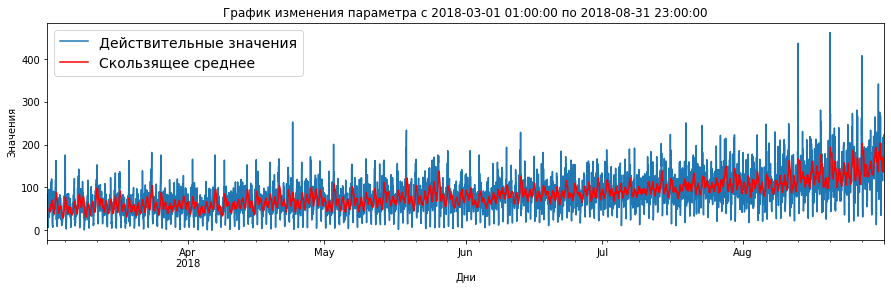

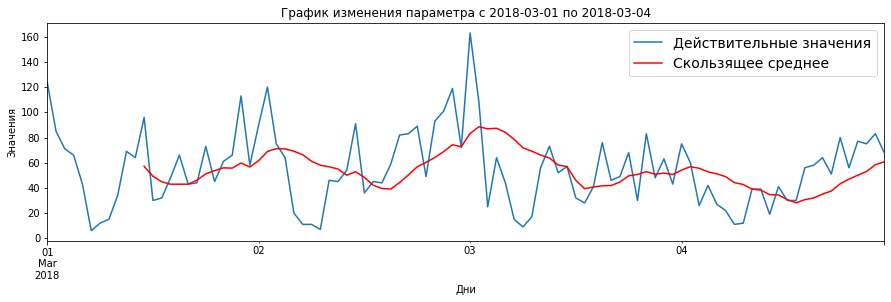

In [6]:
#Изучим полностью график, 

def exploration (df, i, j):
    data = df [i:j]
    data.plot(figsize = (15,4))
    data['num_orders'].rolling(12).mean().plot(color = 'red')
    plt.xlabel('Дни')
    plt.ylabel('Значения')
    plt.title(f'График изменения параметра с {i} по {j}')
    plt.legend(prop={'size': 14}, labels = ['Действительные значения', 'Скользящее среднее'])
    plt.show()

exploration(data, data.index[1], data.index[-1])
exploration(data, '2018-03-01', '2018-03-04')


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, выведен график временного ряда (по часам). Но в качестве скользящего среднего советую взять сутки (24) или неделю (168), это естественные периоды сезонности в наших данных.
</div>

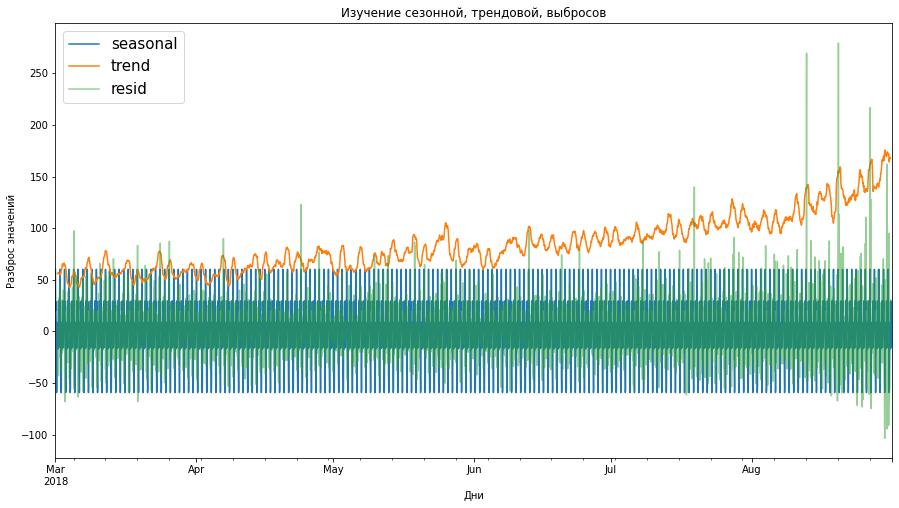

In [7]:
#проведем исследование сезонного и трендового влияния, а также выбросов

sd = seasonal_decompose (data) 
plt.figure (figsize = (15,8))
sd.seasonal.plot()
sd.trend.plot() 
sd.resid.plot(alpha = 0.5)
plt.title('Изучение сезонной, трендовой, выбросов')
plt.legend(prop={'size': 15})
plt.xlabel('Дни')
plt.ylabel('Разброс значений')
plt.show()


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">

В таком виде график абсолютно нечитаем. Попробуй вывести каждый график на отдельном полотне</div>

<div class = 'alert alert-info'>
    Не согласен, данный график показывает изменение параметров относительно друг друга, из которого можно сделать вывод о трендах в всех 3 параметрах
 
<b>Выведу требуемые графики ниже

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 <b>v2</b>  

я по прежнему считаю, что этот график скорее отталкивает, чем что-то поясняет. К тому же ОК, если мы используем аддитивную функцию сезонности. А если бы рассчитывали мультипликативную, то масштабы единиц на графиках были бы совсем разные.
    
Красный комментарий оставлять не буду,  но в портфолио я бы такой график не стал оставлять.    
    
</div>

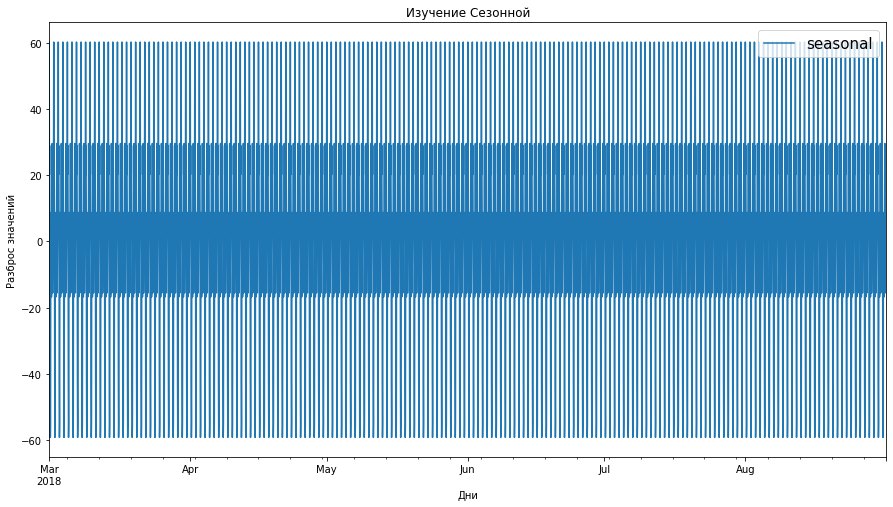

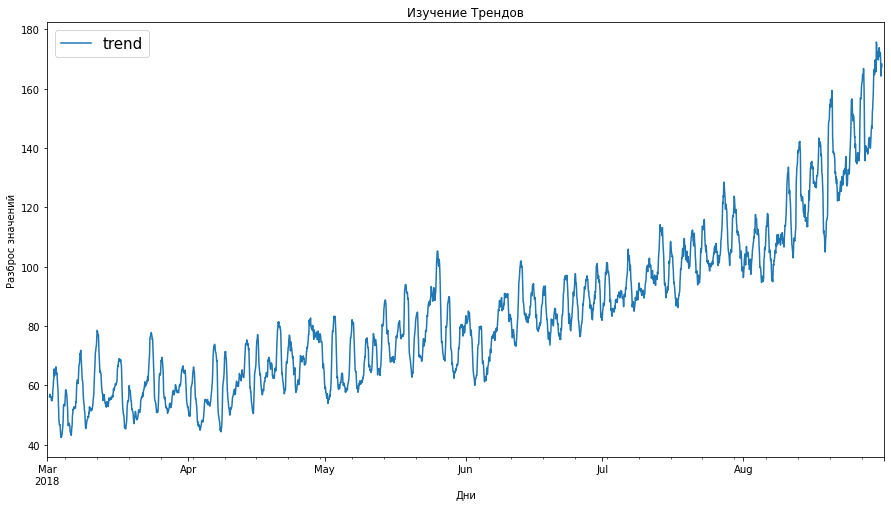

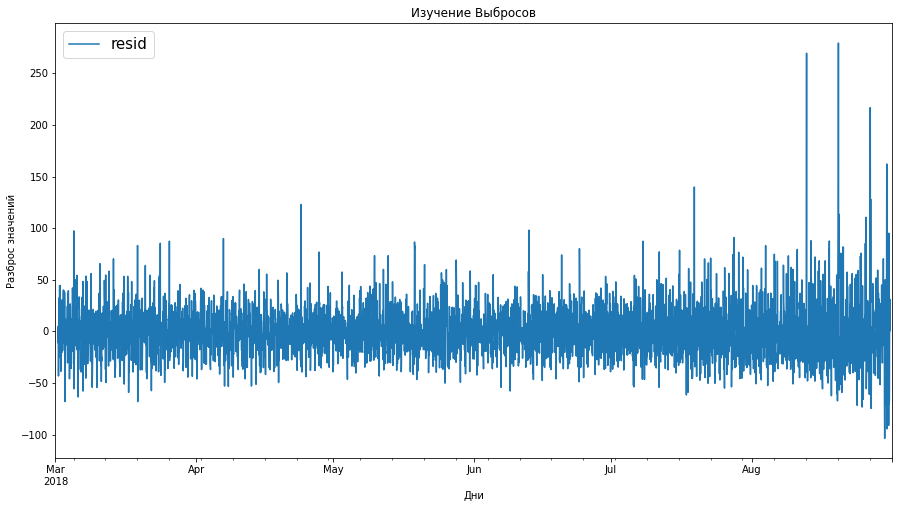

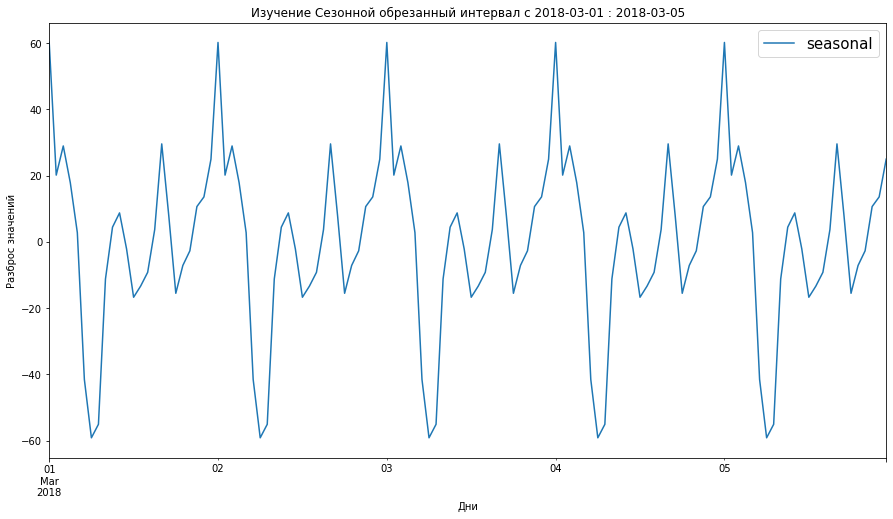

In [8]:
#проведем исследование сезонного и трендового влияния, а также выбросов

season = sd.seasonal
trend = sd.trend
resid = sd.resid

def seasonal(df, i):
    plt.figure (figsize = (15,8))
    df.plot(ax=plt.gca()) 
    plt.title(f'Изучение {i}')
    plt.legend(prop={'size': 15})
    plt.xlabel('Дни')
    plt.ylabel('Разброс значений')
    plt.show()

seasonal(season, 'Сезонной')
seasonal(trend, 'Трендов')
seasonal(resid, 'Выбросов')
seasonal(season['2018-03-01':'2018-03-05'], 'Сезонной обрезанный интервал с 2018-03-01 : 2018-03-05')

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning"> На текущем графике проанализировть сезонность невозможно. Рекомендую  дополнительно вывести сезонность в бОльшем масштабе. Это можно сделать вот так:

    decomposed.seasonal['начало периода': 'конец периода'].plot(ax=plt.gca())
    
Обрати внимание: мы делаем декомпозицию для всех данных, а потом используем срез только для сезонности (т.к. она все равно стабильно повторяется каждые сутки).    
</div>

<div class = 'alert alert-info'>
    Дополнил, поправил

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

<div style = "border:solid Chocolate 2px; padding: 40px">

<font color = 'green' size = 4> Результат данного пункта: </font>
    
    - изучено общее поведение графика. Вывод: данные колеблются в определенных интервалах и имеют восходящий тренд, похоже на стационарных стахостический процесс 
    - изучено на дневном интервале распределение графика. Вывод: к полуночи пользовательская активность увеличивается
    - изучено распределение сезонного/трендового/выбросов графики. Вывод: имеет сезонную активность, значения меняются от -50 до 50. Имеет восходящий тренд, - лучше всего предскажется линейной регрессией. Выбросы -  на всем интервале времени. 
    - период сезонности = 1 сутки, важный признак 1 час

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Давай все-таки разберемся с сезоностью. Какие периоды сезонности ты можешь диагностировать в наших данных?    
</div>

<div class = 'alert alert-info'>
    Дополнил

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    <b>v2</b>  
Советую исследовать сезонность внутри недели, мне кажется этот факт очень интуитивен. Подсказка как это можно сделать была на прошлом ревью.
</div>

## Обучение

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Создание признаков для решения задачи - это важнейший этап, от которого зависит, сможешь ли ты обучить модели или нет. Поэтому что если в признаках есть полезный сигнал, то найти статистическую взаимоствязь между признаками и таргетом сможет любая модель.  А если признаки пустые и неинформативные, то никакая модель не сможет приемлимое качество решения.
    
А создание признаков должно быть основано на проведенном исследовании и его результатах. Ниже я тебе покажу, как можно изменить создание признаков, чтобы они стали действительно полезными.    
</div>

In [9]:
# Наполним датасет фичами

# Дополним как основной фичей от которой зависит кол-во заказов: час и дата 

def prepearing (data, max_lag = 24, level_rolling = 24):
    #data['month'] = data.index.month 
    #data['day'] = data.index.day
    #data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for i in range(1, max_lag+1):
        data[f'lag_{i}'] = data['num_orders'].shift(i)
        
    data[f'rolling_data_mean_{level_rolling}'] = data['num_orders'].shift().rolling(level_rolling).mean()
    
    #data['rest'] = data['num_orders'].shift() - data['num_orders'].shift(2)

    return data

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь час, у нас четкая сезонность внутри суток.
Также очень полезный признак день недели, в данных есть недельная сезонность.
        
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Предлагаю удалить признак "день", т.к. сезонность внутри месяца мы не обнаружили.

</div>

<div class = 'alert alert-info'>
    Дополнил

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 <b>v2</b>  
Стоит вернуть признак "день недели".
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарный признак "месяц" нужно удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<div class = 'alert alert-info'>
    Дополнил

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

In [10]:
prepearing(data, 168, 168)
data = data.dropna()
data.head()

,num_orders,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_data_mean_168
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,143,0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,46.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,54.226190
2018-03-08 01:00:00,78,1,143.0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,54.339286
2018-03-08 02:00:00,65,2,78.0,143.0,94.0,127.0,108.0,76.0,50.0,99.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,54.297619
2018-03-08 03:00:00,68,3,65.0,78.0,143.0,94.0,127.0,108.0,76.0,50.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,54.261905
2018-03-08 04:00:00,60,4,68.0,65.0,78.0,143.0,94.0,127.0,108.0,76.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,54.273810


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
    
Гиперпараметры max_lag, rolling_mean_size очень важны.  Возможно это самые важные гиперпараметры в проекте, больше всего влияющие на результат.
    
Выбирая значения для размера окна и количества отстающих значений важно использовать известную нам информацию о сезонности. А сезонность у нас есть суточная и недельная. Поэтому рекомендую взять их кратными суткам, а лучше равным неделе.
    
 - Скользящее среднее является олицетворением тренда, и если взять его равным суткам, то оно становится достаточно гладким (из него уходитят колебания, вызванные суточной сезонностью), а если взять равное неделе - то еще ровнее. Это хорошо видно пографикам со скользящим средним, если ты посмотришь из за сутки и неделю.
 
 - На использовании отстающих значений и авторегрессии временного ряда основано много методов прогнозироания временных рядов (например ARIMA). И здесь тоже работает принцип - чем больше признаков - тем выше качество. Но разумным компромисом является использование достаточного количества признаков, такого, где автокореляция является значимой. И такими точками как раз служат сутки и неделя. 
    
    
    
    
Резюме: попробуй исползьзовать гиперпараметры max_lag, rolling_mean_size одинаковыми и  равными 24 (сутки)  или 168 (неделя), лучше оба одинаковые.  Имей в виду, что использование 168 отстающих значений может сильно усложнить обучение модели, но метрики получаются значительно лучше.
        
    
</div>

<div class = 'alert alert-info'>
    Понял, а я бошку ломал как это сделать, спасибо 
    
    Качество действительно улучшилось

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> )) </div>

In [11]:
#Подготовим выборки тестовые и трейновые 
X = data.drop(columns = 'num_orders', axis = 1)
y = data['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 0.1)

#Check it 

print('размер трейн фичи', X_train.shape)
print('размер трейн таргет', y_train.shape)
print('размер тест фичи', X_test.shape)
print('размер тест таргет', y_test.shape)
print('')
print('максимальный индекс трейн', X_train.index.max())
print('минимальный индекс тест', X_test.index.min())

размер трейн фичи (3823, 170)
размер трейн таргет (3823,)
размер тест фичи (425, 170)
размер тест таргет (425,)

максимальный индекс трейн 2018-08-14 06:00:00
минимальный индекс тест 2018-08-14 07:00:00


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Корректное разбиение, данные не перемешиваются. </div>

In [12]:
pipeline = Pipeline(
    [
        ('model', DecisionTreeRegressor())
    ])

params = [
    {
        'model': [DecisionTreeRegressor()],
        'model__max_depth': range(1, 20, 4),
        'model__min_samples_split': range(2, 20, 4),
        'model__min_samples_leaf': range(1, 20, 4)
    },
    {
        'model': [RandomForestRegressor()],
        'model__max_depth': range(1, 20, 3),
        'model__min_samples_split': range(2, 20, 4),
        'model__min_samples_leaf': range(1, 20, 4)
    },
    {
        'model': [CatBoostRegressor()],
        'model__depth': range(1, 10, 3)
    }
    ]

rs = RandomizedSearchCV(estimator = pipeline,
                       param_distributions = params,
                       scoring = 'neg_root_mean_squared_error',
                       n_jobs = -1,
                       cv = TimeSeriesSplit(n_splits=5, test_size=int(len(X_train) * 0.1)),
                       n_iter = 15, #количество варинатов
                       random_state = 12345)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=382),
                   estimator=Pipeline(steps=[('model',
                                              DecisionTreeRegressor())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions=[{'model': [DecisionTreeRegressor()],
                                         'model__max_depth': range(1, 20, 4),
                                         'model__min_samples_leaf': range(1, 20, 4),
                                         'model__min_samples_split': range(2, 20, 4)},
                                        {'model': [RandomForestRegressor(max_depth=13,
                                                                         min_samples_leaf=9,
                                                                         min_samples_split=14)],
                                         'model__max_depth': range(1, 20, 3),
                                         'model__min_s

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Перед использованием линейных моделей данные нужно привести к одному масштабу.</div>

<div class = 'alert alert-info'>
    Поправил

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
<b>v2</b>  
Очень жаль, что ты не стал рассматривать линейную модель. Она как раз здесь возможный лидер. 
    
    
Старайся рассматривать модели из разных семейств. У всех есть свои преимущества и недостатки. Так линейные модели очень хорошо могут повторять тренд, что не скажешь про модели, основанные на дереьях.    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 
    
 Для линейных моделей стоит  рассмотреть признаки "час" и "день недели" как категориальные, а не числовые и соответственно применить к ним OHE кодирование (конечно же с использованием pipeline и ColumnTransformer)
    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
 
    
Нужно понимать, что  RandomizedSearchCV будет случайно выбирать модель из всех возможных комбинаций гиперпараметров. Например у линейной регрессии всего одна комбинация, а для RandomForestRegressor целых 175 комбинаций.
    
Поэтому у моделей LinearRegression и CatBoostRegressor шансы попасть в эксперимент минимальны. Вот  подсчитаные вероятности для каждой модели:  
    
Общая сумма комбинаций:

    LinearRegression: 1
    DecisionTreeRegressor: 125
    RandomForestRegressor: 175
    CatBoostRegressor: 4

Общая сумма комбинаций:
1+125+175+4=3051+125+175+4=305.

Вероятности    
    
    LinearRegression: 1305≈0.33%3051​≈0.33%
    DecisionTreeRegressor: 125305≈40.98%305125​≈40.98%
    RandomForestRegressor: 175305≈57.38%305175​≈57.38%
    CatBoostRegressor: 4305≈1.31%3054​≈1.31%  
    
    
</div>

In [13]:
print(f'Лучшая модель - {rs.best_estimator_}')
print(f'Лучшая метрика кросс-валидация = {rs.best_score_ * (-1)}')

Лучшая модель - Pipeline(steps=[('model',
                 RandomForestRegressor(max_depth=13, min_samples_leaf=9,
                                       min_samples_split=14))])
Лучшая метрика кросс-валидация = 24.064217508776654


In [14]:
best_model = rs.best_estimator_

y_train_predict = best_model.predict(X_train)

print(f'RMSE on train dataset = {mean_squared_error(y_train, y_train_predict) ** 0.5}')

RMSE on train dataset = 14.538350288346544


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не нужно переобучать модель заново, ведь лучшая модель, уже обученая на всех доступных данных уже хранится в атрибуте best_estimator_    
</div>

<div class = 'alert alert-info'>
    Поправил

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Оценка на обучающей выборке абсолютно неинформативна. Она позволяет нам понять, насколько сильно модель переобучается, но не дает никакой информации о способности модели к обобщению, т.е. работе сданными, которые она не видела в процессе обучения.


</div>

<div class = 'alert alert-info'>
    Для этого я ее и сделал. Первый раз была ошибка, сделал даталик. Качество было = 0 

<div style = "border:solid Chocolate 2px; padding: 40px">

<font color = 'green' size = 4> Результат данного пункта: </font>
    
    - изучено общее 3 модели:  Дерево решений, случайный лес и катбуст. Лучшей на кросс валидации оказалась модель дерева решений с определенным гиперпараметрами. 
    - применено 15 итераций для поиска наилучших параметров и TimeSeriesSplit для кросс-валидации
    - Забили лучшую модель в best_model, будем использовать для тестирования

## Тестирование

Проведем анализ на тестовой выборке: 

In [15]:
y_test_predict = best_model.predict(X_test)

print(f'RMSE on train dataset = {mean_squared_error(y_test, y_test_predict) ** 0.5}')

RMSE on train dataset = 39.69265271705556


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец: 
    
  - тестирование произведено корректно 
  - достигнута хорошая точность на тестовой выборке
    
Но кроме вычисления метрики было бы неплохо сделать визуализацию со сравнением фактических данных и лучшего прогноза. 
</div>


<div style = "border:solid Chocolate 2px; padding: 40px">

<font color = 'green' size = 4> Результат данного пункта: </font>
    
    - Подобранная модель показала метрику RMSE = 39.6, что проходит по ограничению 

<div class = 'alert alert-info'>
    Дополнил, это значение (8) на тесте, как раз когда был даталик. Просто в начале обрадовался, потом скорректировал, потом забыл убрать 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Выводне соответствует результатам тестировния</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    <b>v2</b> 👍 </div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Я вижу, что с проектом ты справляешься - проведено исследование, созданы признаки, обучены модели. Получено необходимое качество на тествой выборке.
    
    
Мне понравилось, что ты корректно выполнил кросс-валидацию для временных рядов (TimesweriesSplit).
    
    
Что нужно доработать обязательно:
    
 - вывести графики, полученные после декомпозиции в читаемом виде
 - пожалуйста определи, какие периоды сезонности есть в наших данных и отрази это в выводах
 - нужно удалить календартный признак месяц
 - перед ипользованием линейных моделей пожалуйста масштабируй числовые признаки
 - вывод после тестирования должен соответствовать результатам тестирования    
    
Желтые комментарии на твое усмотрение. Но очень советую уделить внимание признакам "количество отстающих значений" и "размер окна для скользящего среднего".
    
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Дополнительные материалы </b>

Если решишь глубже погрузиться в тему временных рядов, думаю тебе стоит знать что подход, изученный в курсе далеко не единственный. Вот к чему возможно стоит обратиться:
 - Авторегрессионные модели семейства ARIMA. В качестве экскурса очень полезно следующее видео: https://www.youtube.com/watch?v=u433nrxdf5k&t=110s
 - Библиотека prophet от Facebook. По моим наблюдениям, качество решения этой моделью ниже, но она очень проста в применении. https://habr.com/ru/company/ods/blog/323730/
    
 - Урок по временным рядам из курса ML от ODS (https://habr.com/ru/company/ods/blog/327242/)
 - Лекция по прогнозированию временных рядов из курса Computer Science Center (https://www.youtube.com/watch?v=COBcXzKmOyk)   


</div>